**Panda, Cat, and Dogs Classification**
Dalam sesi ini, kita akan membuat sebuah model machine learning yang mampu membedakan antara Panda, kucing dan anjing. Dalam satu dataset ini, terdapat 1000 data gambar Panda, kucing dan anjing. kita akan membagi data tersebut 80% utk data latih dan 20% untuk data uji.

# Impor Modul

In [257]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import tensorflow as tf
from sklearn.model_selection import train_test_split

Pertama-tama, kita akan mengekstrak file dari direktori. File ini terdiri atas gambar monyet, anjing dan kucing. Masing-masing file telah digolongkan menjadi data latih (train) dan juga data uji.

In [258]:
#local_zip = './Data Source/archive.zip'
#zip_ref = zipfile.ZipFile(local_zip,'r')
#zip_ref.extractall('./cat-dog-panda')
#zip_ref.close()

In [259]:
TRAINING_DIR = './cat-dog-panda/animals'

Setelah mengekstrak, kita akan mencoba menggunakan ImageDataGenerator untuk mempermudah pemrosesan data gambar. API ini juga akan memasukkan data gambar ke dalam model neural network yang akan kita bangun.Namun sebelumnya kita akan mendefinisikan letak direktori file-file tersebut.

In [260]:
train_cat_dir = os.path.join('./cat-dog-panda/animals','cats')
train_dog_dir = os.path.join('./cat-dog-panda/animals','dogs')
train_panda_dir = os.path.join('./cat-dog-panda/animals','panda')

Mari kita cek ukuran file. Ada berapa junmlah gambar kucing, anjing dan panda?

In [261]:
print(f'Jumlah gambar kucing ada {len(os.listdir(train_cat_dir))}')
print(f'Jumlah gambar anjing ada {len(os.listdir(train_dog_dir))}')
print(f'Jumlah gambar panda ada {len(os.listdir(train_panda_dir))}')


Jumlah gambar kucing ada 1000
Jumlah gambar anjing ada 1000
Jumlah gambar panda ada 1000


Kode berikut untuk mengecek nama file dari masing-masing direktori

In [262]:
train_cat_filename = os.listdir(train_cat_dir)
print(train_cat_filename[:8])

train_dog_filename = os.listdir(train_dog_dir)
print(train_dog_filename[:8])

train_panda_filename = os.listdir(train_panda_dir)
print(train_panda_filename[:8])


['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg']
['dogs_00001.jpg', 'dogs_00002.jpg', 'dogs_00003.jpg', 'dogs_00004.jpg', 'dogs_00005.jpg', 'dogs_00006.jpg', 'dogs_00007.jpg', 'dogs_00008.jpg']
['panda_00001.jpg', 'panda_00002.jpg', 'panda_00003.jpg', 'panda_00004.jpg', 'panda_00005.jpg', 'panda_00006.jpg', 'panda_00007.jpg', 'panda_00008.jpg']


Coba kita lihat 5 data pertama dari masing-masing direktori. Untuk itu kita perlu menggunakan modul **matplotlib image**

In [263]:
%matplotlib inline

#parameter untuk gambar yang akan ditambilkan
nrows = 4
ncols = 4

#akan dilakukan iterasi untuk menampilkan gambar
pic_index = 0

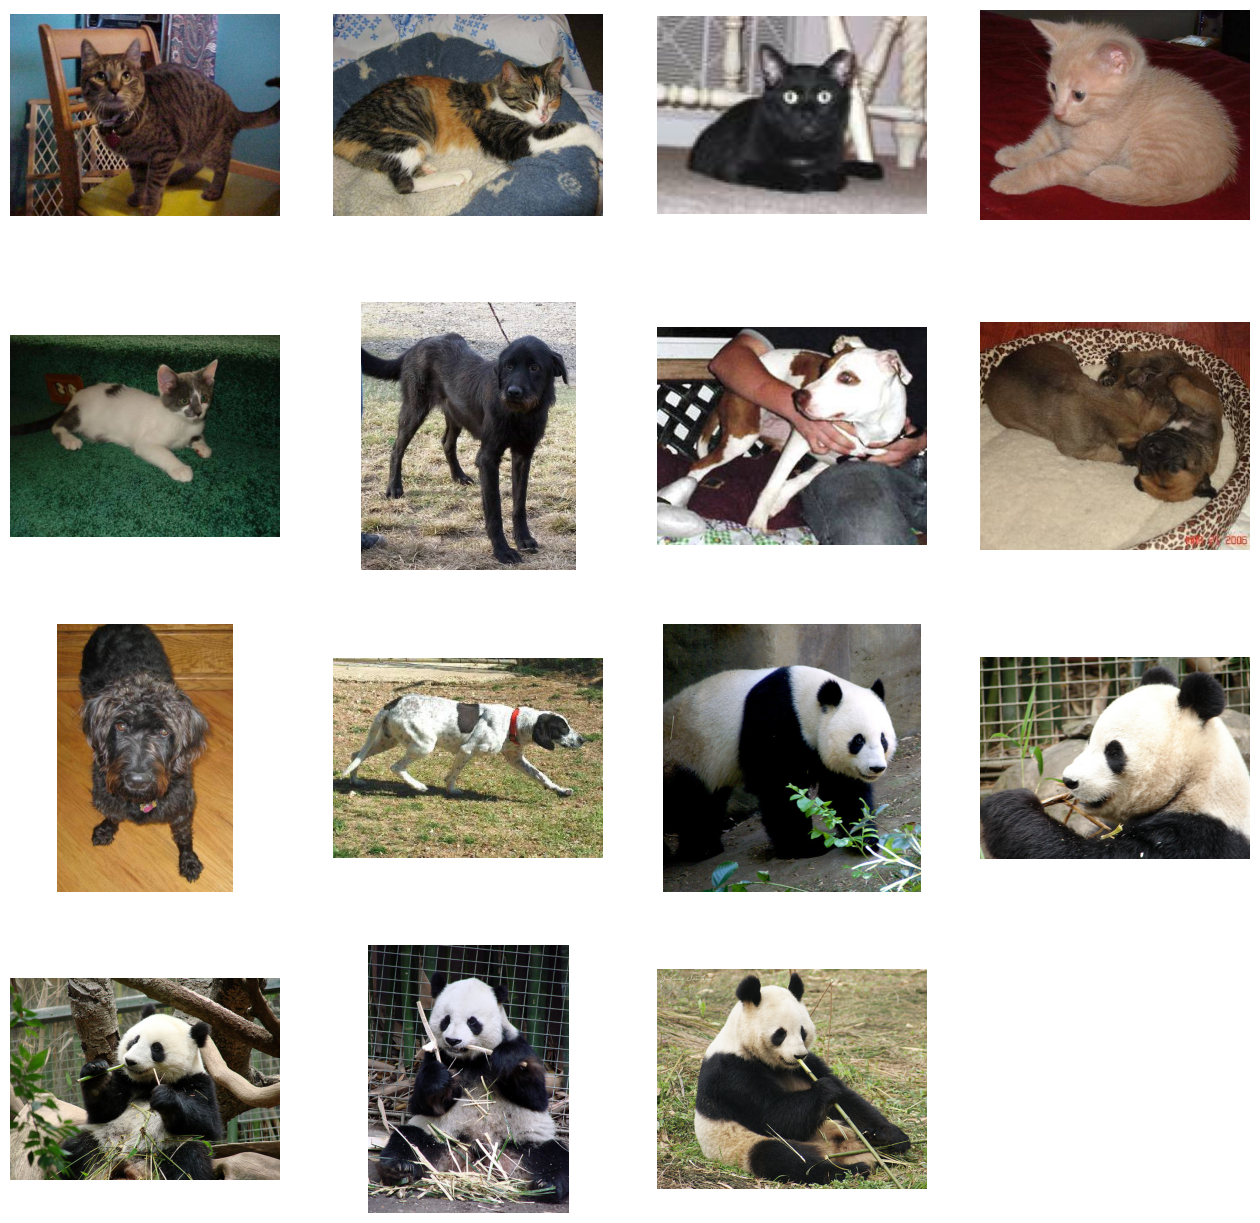

In [264]:
#buat matplotlib fig. dan sesuaikan ukuran menjadi baris dan kolom yang telah didefinisikan di kode sebelumnya

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 5

next_cat_pix = [os.path.join(train_cat_dir,fname) for fname in train_cat_filename[pic_index-5:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir,fname) for fname in train_dog_filename[pic_index-5:pic_index]]
next_panda_pix = [os.path.join(train_panda_dir,fname)for fname in train_panda_filename[pic_index-5:pic_index]]

for i, image_path in enumerate(next_cat_pix + next_dog_pix + next_panda_pix):
    sp = plt.subplot(nrows,ncols,i + 1)
    sp.axis('Off')

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

## Membuat Model CNN

Kita akan menggunakan Tensorflow sebagai module untuk membuat model machine learning. Dengan jaringan saraf konvolusional (CNN) yang terhubung dengan satu layer Dense dengan fungsi aktivasi softmax akan menentukan klasifikasi dari 3 objek.

In [289]:
from keras import regularizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    #satu layer Flatten untuk memadatkan matriks menjadi vektor
    tf.keras.layers.Flatten(),
    # 128 lapisan dense dan 1 lapisan output dengan fungsi aktivasi softmax, dengan 3 dense layer
    tf.keras.layers.Dense(512,activation='relu',kernel_regularizer = regularizers.l2(0.001),activity_regularizer = regularizers.l2(0.01)),
    tf.keras.layers.Dense(3,activation='softmax')
])

c:\Users\INTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Kamu bisa memeriksa lapisan-lapisan yang telah kamu buat, dengan kode berikut

In [290]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_136 (Conv2D)             │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_127               │ (None, 111, 111, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_128               │ (None, 54, 54, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_138 (Conv2D)             │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_129               │ (None, 26, 26, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_139 (Conv2D)             │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_130               │ (None, 12, 12, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_140 (Conv2D)             │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_131               │ (None, 5, 5, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_37 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,704,195 (14.13 MB)

 Trainable params: 3,704,195 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

Untuk mengcompile model, kita akan menggunakan optimizer Adam dengan fungsi biaya(loss) categorical crossentropy. Kenapa? Karena kita akan mengklasifikasikan lebih dari dua objek. Dengan metrics yang digunakan adalah "accuracy", kita akan lebih mudah melihat perkembangan model yang telah dibuat.

In [297]:

model.compile(loss ='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-3),
              metrics = ['accuracy'])

## Data Preprocessing

Selanjutnya, kita akan mempersiapkan file untuk 'memberi makan' model yang telah kita buat. Disini kita cukup mengimpor modul ImageDataGenerator untuk mempermudah processing data. Data gambar akan disesuaikan dengan ukuran permintaan model yaitu 300 x 300. Karena gambar yang kita miliki adalah gambar berwarna/RGB kita akan menambahkan angka 3 pada tuple. Sehingga ukuran gambar yang akan dicompile ke dalam model adalah (300,300,3)

Kita juga akan memproses data dengan menormalisasi ukuran gambar, dengan melakukan rescaling pada gambar dengan membagi dengan 255.0

Karena kita tiadk membagi antara data uji dengan data latih, jadi pada ImageDataGenerator kita akan menggunakan parameter 'validation_split' yang akan membagi antara data latih dengan data uji sesuai dengan proporsi yang kita inginkan. Disini kita akan mencoba menggunakan validation_split = 0.2.

In [298]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#semua data gambar akan di rescale di dalam fungsi
def train_validation_generator(training_directory):

    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                       horizontal_flip = True,
                                        rotation_range = 30,
                                        shear_range = 0.3,
                                        zoom_range = 0.3,
                                        fill_mode = 'nearest',
                                   validation_split = 0.2)
    
    validation_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                        validation_split = 0.2)
    
    #kita akan 'alirkan data gambar dari direktori ke dalam model, dengan menggunakan flow_from_directory
    train_generator = train_datagen.flow_from_directory(
    training_directory,
    target_size = (224,224),
    #definisikan batch_size
    batch_size = 32,
    color_mode = 'rgb',
    #Atur shuffle = True, parameter ini akan mengacak gambar tiap kali pelatihan, sehingga mengurangi kemungkinan terjadinya overfitting.
    shuffle = True,
    #Karena kita akan melakukan penggolongan menjadi 3 kelas objek, maka kelas akan diatur menjadi 'categorical'
    class_mode = 'categorical',
    #karena sebelumnya kita memakai parameter validation split di ImageDataGenerator, maka kita harus menjelaskan di sini
    #apakah data ini training atau bukan.
    subset = 'training')

    valid_generator = validation_datagen.flow_from_directory(
    training_directory,
    target_size = (224,224),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'validation')

    return train_generator,valid_generator


In [299]:
train_generator,validation_generator = train_validation_generator(training_directory = TRAINING_DIR)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


## Ayo kita latih!

Model telah selesai dibuat, compiler model telah diatur dan data sudah di proses. Sebelum memulai proses pelatihan, kita akan menggunakan method '.fit' pada model. Disini kita akan mengatur jumlah epoch,data-data yang akan dimasukkan ke dalam model untuk di-fitting dan lain-lain.

In [300]:
batch_size = 32

history = model.fit(
    train_generator,
    epochs = 70 ,
    verbose = 1,
    validation_data = validation_generator
)

saved_model = model.save("CatDogPandaClassifier.h5")

Epoch 1/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4925 - loss: 1.7822 - val_accuracy: 0.5550 - val_loss: 1.4735
Epoch 2/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5883 - loss: 1.4065 - val_accuracy: 0.5750 - val_loss: 1.2529
Epoch 3/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6161 - loss: 1.2024 - val_accuracy: 0.6083 - val_loss: 1.1089
Epoch 4/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6534 - loss: 1.0870 - val_accuracy: 0.5617 - val_loss: 1.0700
Epoch 5/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6482 - loss: 1.0147 - val_accuracy: 0.6267 - val_loss: 0.9891
Epoch 6/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6802 - loss: 0.9581 - val_accuracy: 0.6167 - val_loss: 0.9978
Epoch 7/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.6967 - loss: 0.9201 - val_accuracy: 0.6567 - val_loss: 0.9191
Epoch 8/70
75/75 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.7106 - loss: 0.8802 - val_accuracy: 0.7167 - v

Kita akan menguji model ini dengan memberikannya gambar yang tidak ada di dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


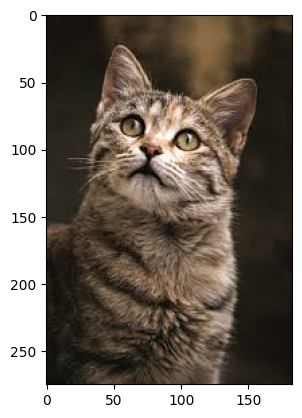

(array([[0.61879903, 0.33227623, 0.04892471]], dtype=float32), 'cat')

In [342]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

labels = ['cat','dog','panda']
IMAGE_PATH = './cat-dog-panda/images'
MODEL_PATH = 'CatDogPandaClassifier.h5'

loading_model = tf.keras.models.load_model(MODEL_PATH)

def predict_image(image_path,model):
    #ubah ukuran input model
    image = Image.open(os.path.join(image_path))
    image_resize = image.resize((224,224))
    img_array = np.array(image_resize) /255.0
        #menambahkan batch dimension

    img_array = np.expand_dims(img_array,axis = 0)
    predictions = model.predict(img_array,batch_size = 10, verbose ='auto')
    imgplot = plt.imshow(image)
    plt.show()

    return predictions,labels[np.argmax(predictions)]

predict_image(image_path = os.path.join(IMAGE_PATH,'cat.jpg'), model = loading_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


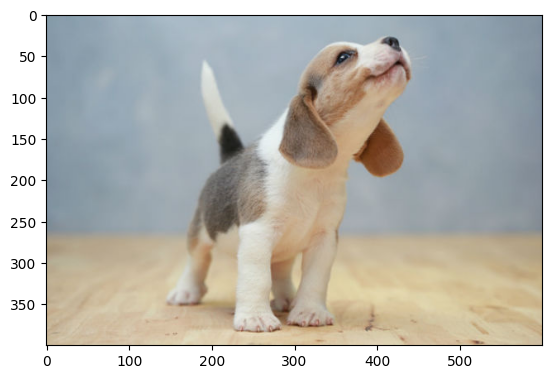

(array([[0.25877774, 0.7055379 , 0.03568437]], dtype=float32), 'dog')

In [343]:
predict_image(image_path = os.path.join(IMAGE_PATH,'dog.jpg'),model = loading_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


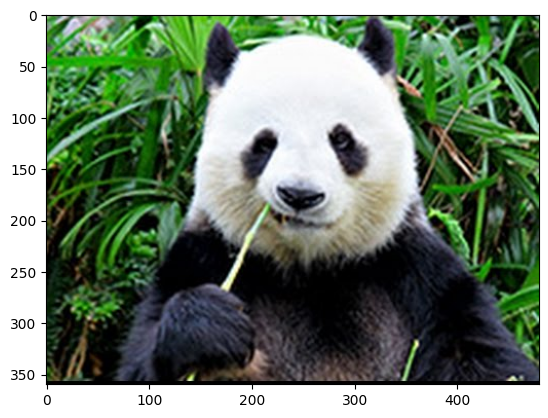

(array([[0.00142725, 0.00187318, 0.99669963]], dtype=float32), 'panda')

In [344]:
predict_image(image_path = os.path.join(IMAGE_PATH,'panda.jpg'),model = loading_model)